# Transformations

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def imshow(img):
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### Translations

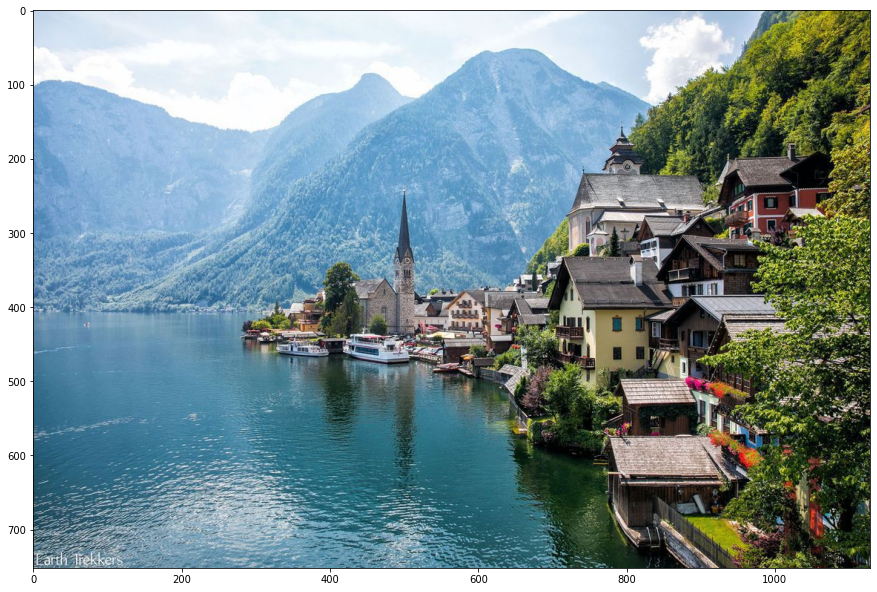

In [10]:
# Load an image
img = cv2.imread('./img/day1.jpg')
imshow(img)

In [12]:
# Store the height and width of the image (you will need them later)
h,w=img.shape[:-1]
h,w

(752, 1129)

In [21]:
# Create the translation Matrix
translation_matrix=np.float32([
    [1,0,-200], #you can the negative values to it
    [0,1,-150],   
])

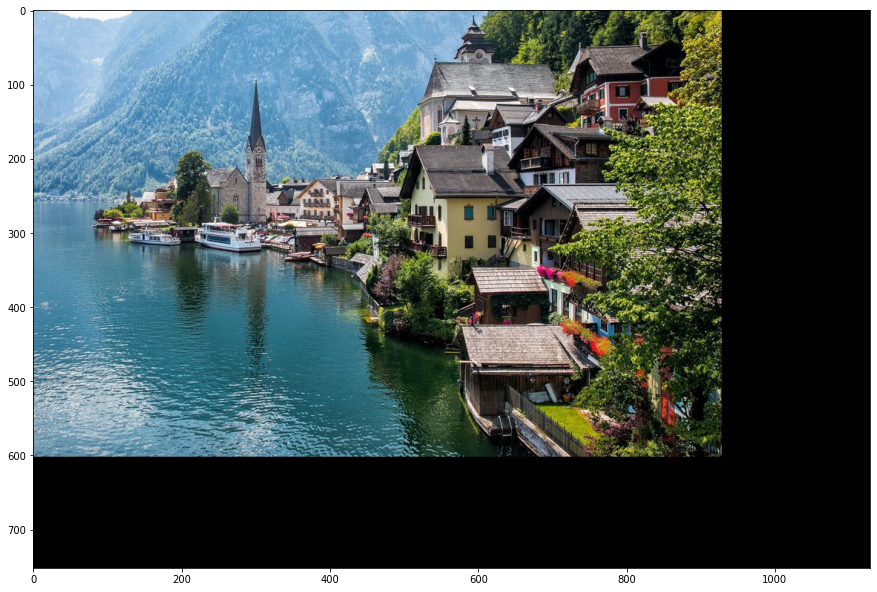

In [22]:
# Apply the translation to the image using cv2.warpAffine and display the new image
image=cv2.warpAffine(img,translation_matrix,(w,h))
imshow(image)


### Rotation

In [26]:
# Load an image

x_center=w//2
y_center=h//2

# Create a rotation matrix to rotate the image by 45 degrees (using the center as the pivot point) 
rotation_matrix=cv2.getRotationMatrix2D((x_center,y_center),
                                       45,1)

[Hint](# "cv2.getRotationMatrix2D") 


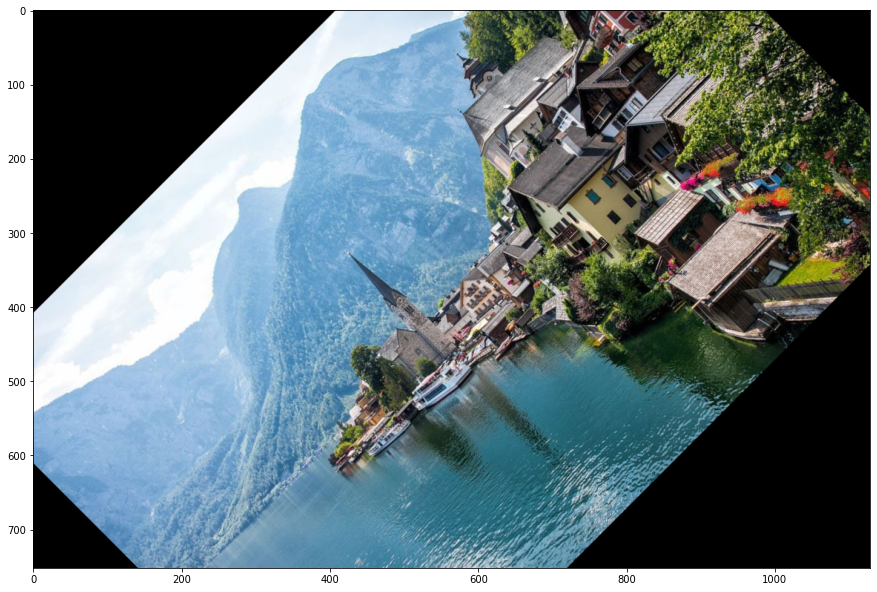

In [27]:
# Apply the rotation matrix to the image and display the rotated image
img_rotated=cv2.warpAffine(img,rotation_matrix,(w,h))
imshow(img_rotated)

### Scaling images

#### Interpolation methods

* INTER_NEAREST - a nearest-neighbor interpolation (Fastest)
* INTER_LINEAR - a bilinear interpolation (used by default) (good for upsampling)
* INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method. (Good for downsampling)
* INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood (Better)
* INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood (Best one)

#### Downsampling

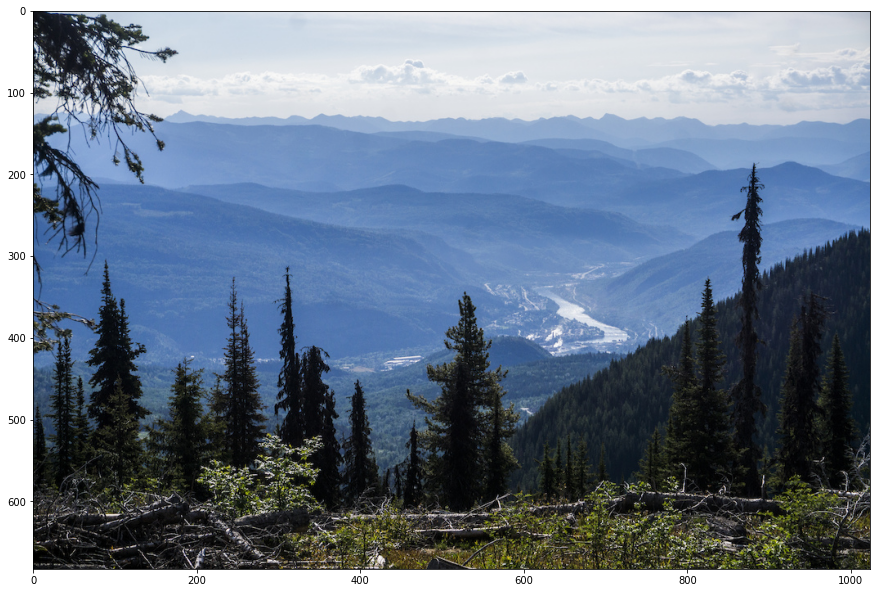

In [28]:
# Load and image and downsample it by half, try all the interpolation methods
# which one renders the best result?
img = cv2.imread('./img/day2.jpg')
imshow(img)

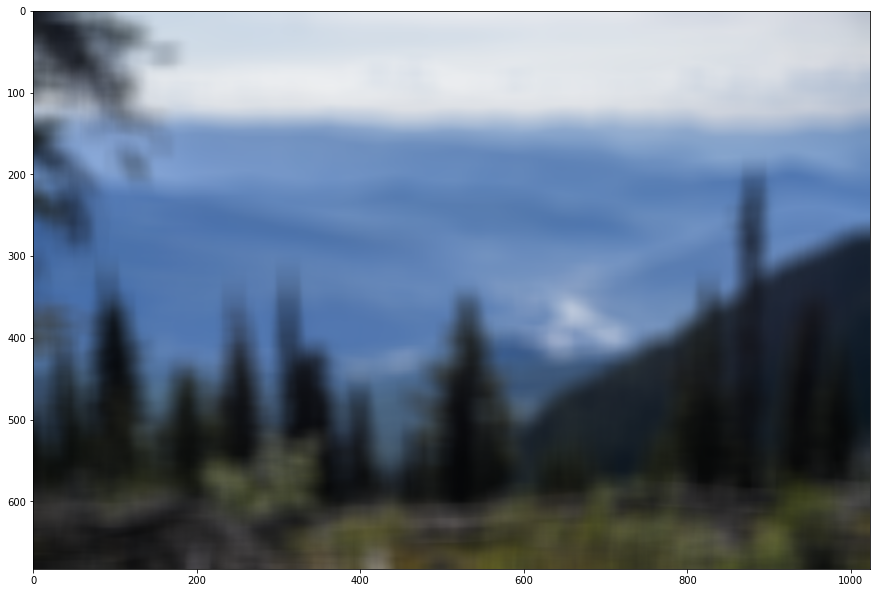

In [30]:
img_blur=cv2.blur(img,(30,30))
imshow(img_blur)

In [37]:
img=cv2.resize(img,None, fx=1, fy=1, interploation=cv2.INTER_NEAREST)
imshow(img)

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - 'interploation' is an invalid keyword argument for resize()
>  - 'interploation' is an invalid keyword argument for resize()


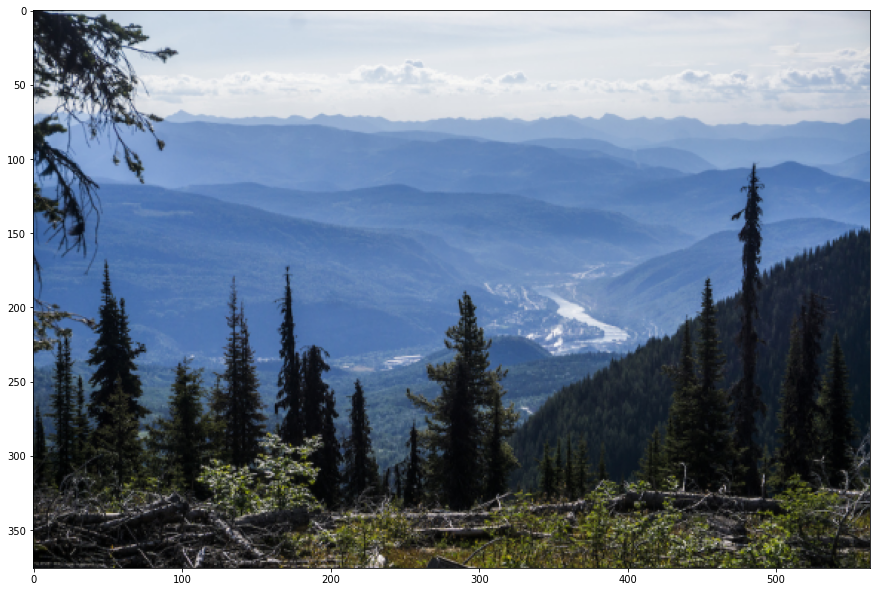

In [39]:
new_width=w//2
new_height=h//2
img_half=cv2.resize(img, (new_width,new_height),
                   interpolation=cv2.INTER_AREA)
imshow(img_half)

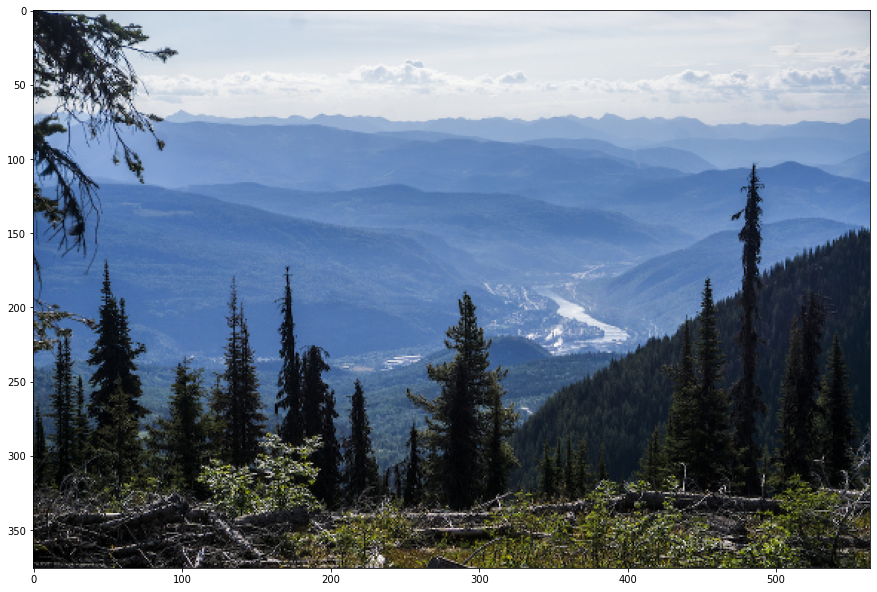

In [43]:
new_width=w//2
new_height=h//2
img_lanc=cv2.resize(img, (new_width,new_height),
                   interpolation=cv2.INTER_LANCZOS4)
imshow(img_lanc)

[Hint](# "cv2.resize") 

#### Upsampling

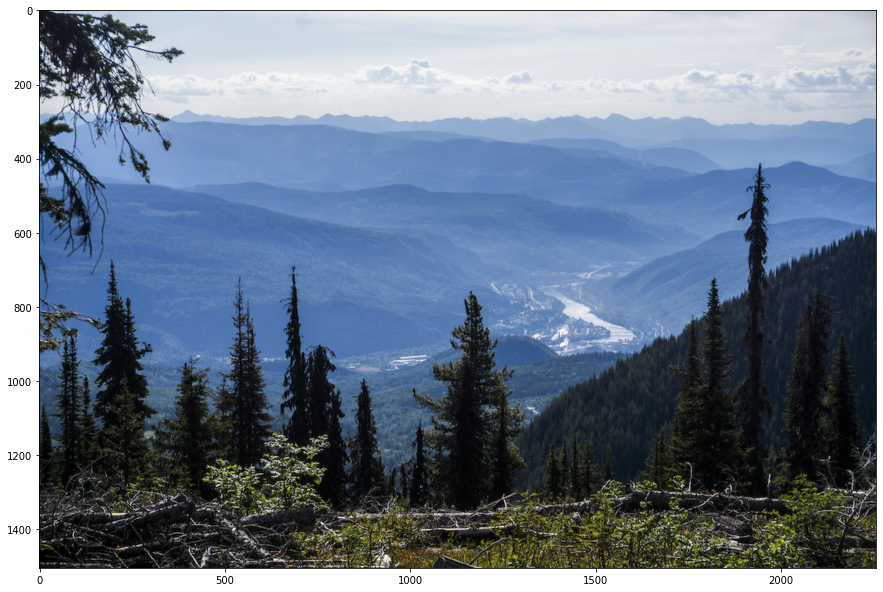

In [44]:
# Load and image and upsample it by double its size, try all the interpolation methods 
# which one renders the best result?

new_width=w*2
new_height=h*2
img_lanc=cv2.resize(img, (new_width,new_height),
                   interpolation=cv2.INTER_LANCZOS4)
imshow(img_lanc)

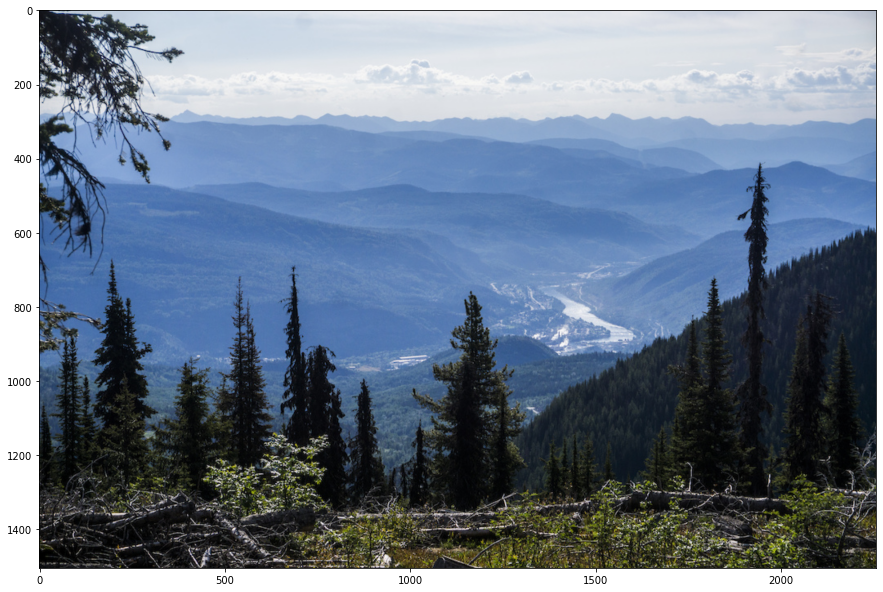

In [45]:
new_width=w*2
new_height=h*2
img_lanc=cv2.resize(img, (new_width,new_height),
                   interpolation=cv2.INTER_AREA)
imshow(img_lanc)

In [2]:
import cv2
import mediapipe as mp
import time

faceDetector = mp.solutions.face_detection
drawing = mp.solutions.drawing_utils


# For webcam input:
cap = cv2.VideoCapture(1)

with faceDetector.FaceDetection(

    min_detection_confidence=0.5) as face_detection:

  while cap.isOpened():

    success, image = cap.read()

    start = time.time()

    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # Convert the BGR image to RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = face_detection.process(image)

    # Draw the face detection annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
 
    if results.detections:
      for id, detection in enumerate(results.detections):
        drawing.draw_detection(image, detection)

    end = time.time()
    totalTime = end - start

    fps = 1 / totalTime
    print("FPS: ", fps)

    cv2.putText(image, f'FPS: {int(fps)}', (20,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 2)

    cv2.imshow('MediaPipe Face Detection', image)

    if cv2.waitKey(5) & 0xFF == 27:
      break

cap.release()

FPS:  63.922944448677896
FPS:  201.18495778971604


ZeroDivisionError: float division by zero

In [1]:
import mediapipe 